K-최근접 이웃 (K-Nearest Neighbors, KNN)이란?


K-최근접 이웃은 새로운 데이터가 주어졌을 때, 주변의 가장 가까운 K개의 이웃을 찾아 그들의 속성을 참고해 예측하는 직관적인 머신러닝 알고리즘입니다.


1. 핵심 원리

새로운 데이터에 대해,


    - 가장 가까운 K개 이웃을 찾습니다.

    - 이웃들의 클래스를 확인합니다.

    - 다수결을 통해 새로운 데이터의 클래스를 예측합니다.


2. 'K'는 무엇인가요?

'K'는 이웃의 수를 의미하며, 모델 성능에 중요한 영향을 미칩니다.

     - K가 작으면: 미세한 패턴에 민감해져 예측이 불안정할 수 있습니다.

     - K가 크면: 전체적인 패턴을 따르지만, 너무 크면 예측이 부정확해질 수 있습니다.

따라서 적절한 K 값을 찾는 과정이 중요합니다.


3. '가깝다'는 기준은?

KNN은 데이터 간의 거리를 계산해 가까움을 판단합니다. 

주로 유클리드 거리를 사용하며, 거리가 왜곡되지 않도록 각 특성의 스케일을 맞춰주는 표준화 작업이 필수적입니다.



장점

- 매우 간단하고 직관적입니다.

- 사전 학습이 필요 없습니다.



단점

- 데이터가 많으면 예측 속도가 느립니다.

- 특성의 스케일에 매우 민감합니다.

--- K-최근접 이웃 모델 성능 평가 (n_neighbors=5) ---
훈련 세트 정확도: 0.9033
테스트 세트 정확도: 0.8351


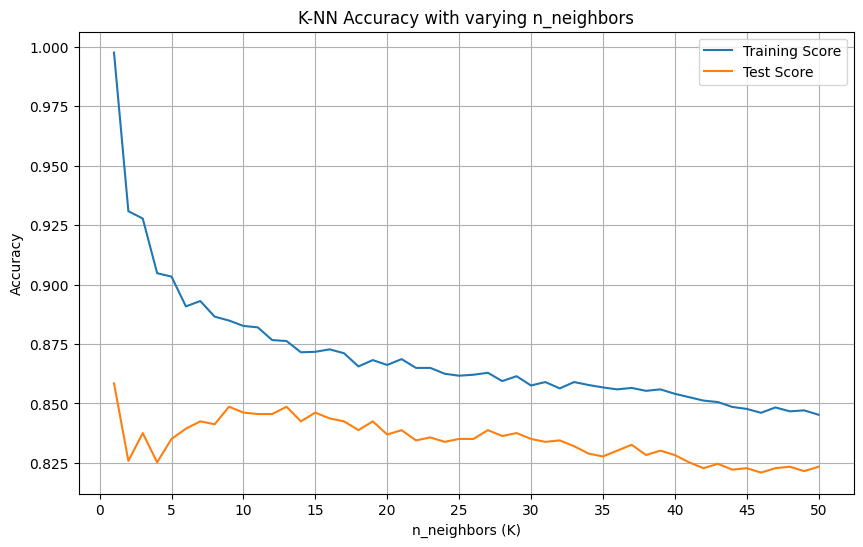


테스트 정확도가 가장 높았던 K 값은 1 입니다.
최고 테스트 정확도: 0.8585


In [2]:
# 1. 필요한 라이브러리를 불러옵니다.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 2. 와인 데이터를 불러와 특성(X)과 타겟(y)을 분리합니다.
# 이 파일은 '03_모델_훈련_평가' 폴더에 있으므로,
# 'wine_csv_data.csv' 파일을 불러오려면 상대 경로를 사용해야 합니다.
# 만약 'my_ml_project/data/'에 파일을 두었다면 pd.read_csv('../../data/wine_csv_data.csv')와 같이 사용합니다.
df = pd.read_csv("https://bit.ly/wine_csv_data")
X = df[['alcohol', 'sugar', 'pH']]
y = df['class']

# 3. 데이터를 훈련 세트와 테스트 세트로 나눕니다.
# test_size=0.25는 훈련 세트 75%, 테스트 세트 25% 비율을 의미합니다.
# `y_test` 변수를 추가하여 `train_test_split`의 4개 반환값을 모두 할당합니다.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# 4. K-최근접 이웃은 거리 기반 알고리즘이므로, 스케일링이 필수적입니다.
# 특성(X) 데이터를 표준화(Standard Scaling)하여 스케일을 맞춥니다.
ss = StandardScaler()
ss.fit(X_train)
X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

# 5. K-최근접 이웃 분류기(KNeighborsClassifier) 모델을 만듭니다.
# n_neighbors=5는 가장 가까운 이웃 5개의 데이터를 참고하겠다는 의미입니다.
knn = KNeighborsClassifier(n_neighbors=5)

# 6. 훈련 세트로 모델을 학습시킵니다.
knn.fit(X_train_scaled, y_train)

# 7. 훈련 세트와 테스트 세트의 정확도(accuracy)를 평가합니다.
train_score = knn.score(X_train_scaled, y_train)
test_score = knn.score(X_test_scaled, y_test)

print("--- K-최근접 이웃 모델 성능 평가 (n_neighbors=5) ---")
print(f"훈련 세트 정확도: {train_score:.4f}")
print(f"테스트 세트 정확도: {test_score:.4f}")

# 8. K 값에 따른 정확도 변화를 확인하여 최적의 K 값을 찾아봅니다.
# 훈련 세트와 테스트 세트의 정확도를 저장할 리스트를 만듭니다.
train_scores = []
test_scores = []

# K 값을 1부터 50까지 변화시키며 모델을 훈련하고 정확도를 측정합니다.
for n in range(1, 51):
    # n_neighbors를 n으로 설정하여 모델을 생성하고 훈련시킵니다.
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train_scaled, y_train)

    # 훈련 세트와 테스트 세트의 정확도를 계산하여 리스트에 추가합니다.
    train_scores.append(knn.score(X_train_scaled, y_train))
    test_scores.append(knn.score(X_test_scaled, y_test))

# 9. K 값에 따른 훈련 및 테스트 정확도 변화를 시각화합니다.
plt.figure(figsize=(10, 6))
plt.plot(range(1, 51), train_scores, label='Training Score')
plt.plot(range(1, 51), test_scores, label='Test Score')
plt.title('K-NN Accuracy with varying n_neighbors')
plt.xlabel('n_neighbors (K)')
plt.ylabel('Accuracy')
plt.xticks(np.arange(0, 51, 5)) # x축 눈금 단위를 5로 설정
plt.legend()
plt.grid(True)
plt.show()

# 가장 높은 테스트 정확도를 보인 K 값을 찾아 출력합니다.
best_k = np.argmax(test_scores) + 1
best_test_score = np.max(test_scores)

print(f"\n테스트 정확도가 가장 높았던 K 값은 {best_k} 입니다.")
print(f"최고 테스트 정확도: {best_test_score:.4f}")
